In [1]:
!kaggle datasets download -d suruchiarora/yahoo-finance-dataset-2018-2023


Dataset URL: https://www.kaggle.com/datasets/suruchiarora/yahoo-finance-dataset-2018-2023
License(s): ODbL-1.0
  0% 0.00/77.5k [00:00<?, ?B/s]
100% 77.5k/77.5k [00:00<00:00, 60.6MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('yahoo-finance-dataset-2018-2023.zip', 'r') as zip_ref:
    zip_ref.extractall('stock_price')

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [16]:
df = pd.read_excel('/content/stock_price/yahoo_data.xlsx')
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Adj Close**', 'Volume', 'Close*']])

X = scaled_data[:, :-1]
y = scaled_data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [45]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=5, batch_size=64)

predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.3183
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0201
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [46]:
mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.005515501770380814
RMSE: 0.07426642424663257


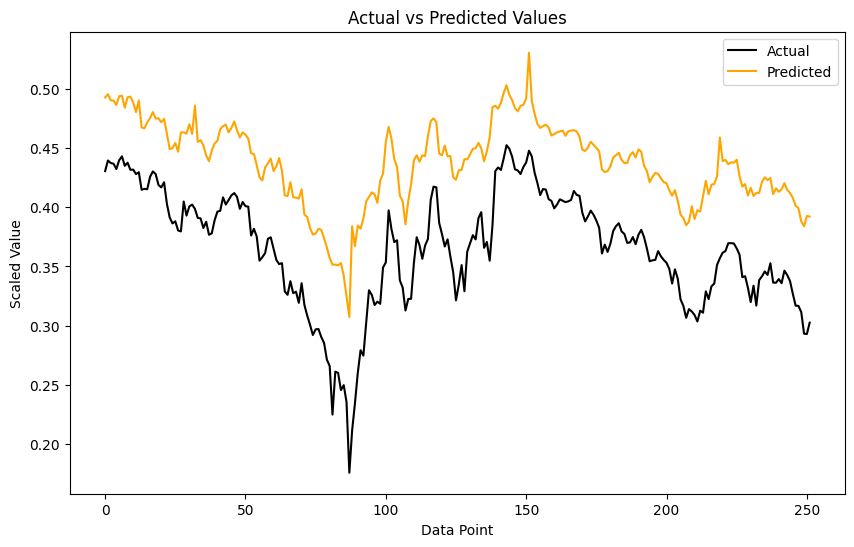

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='black')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()